Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('heart_disease_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Feature Selection

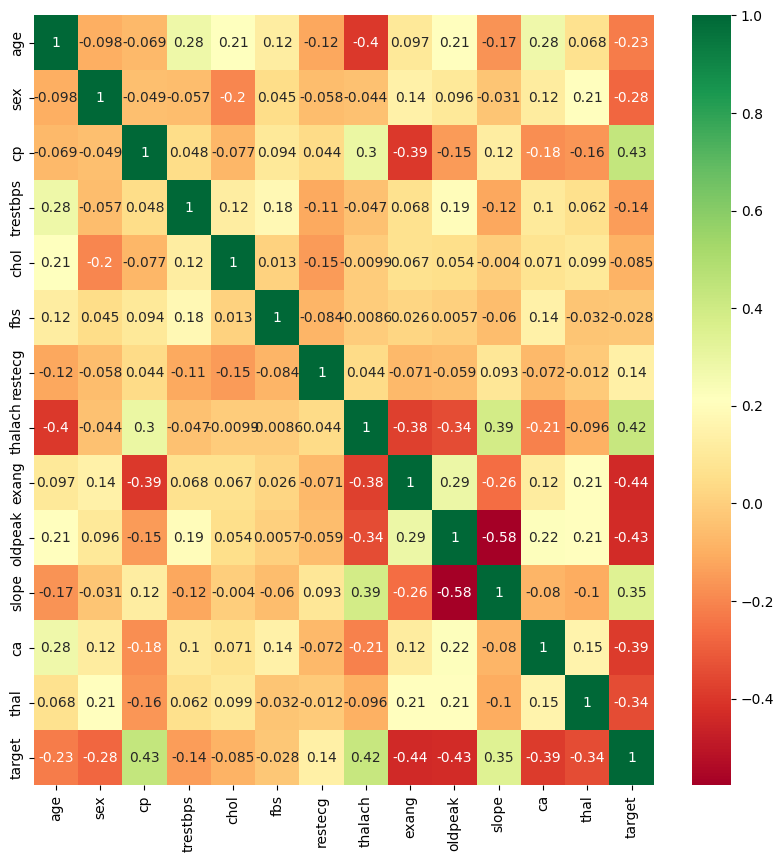

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map--
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

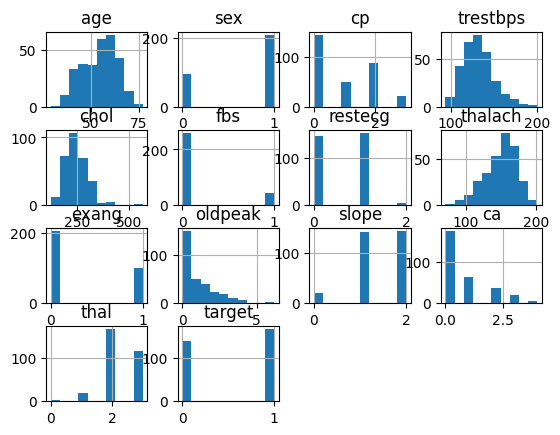

In [8]:
df.hist()

C:\Users\sudes\AppData\Local\Temp\ipykernel_19672\784366222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

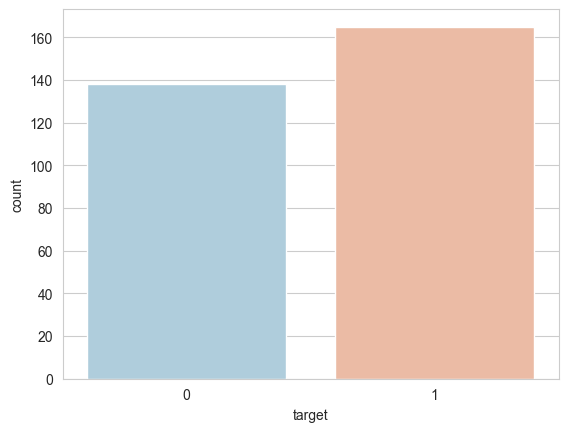

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

Data Processing

In [10]:
#dummy columns for categorical variables
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [13]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [14]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN

In [15]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

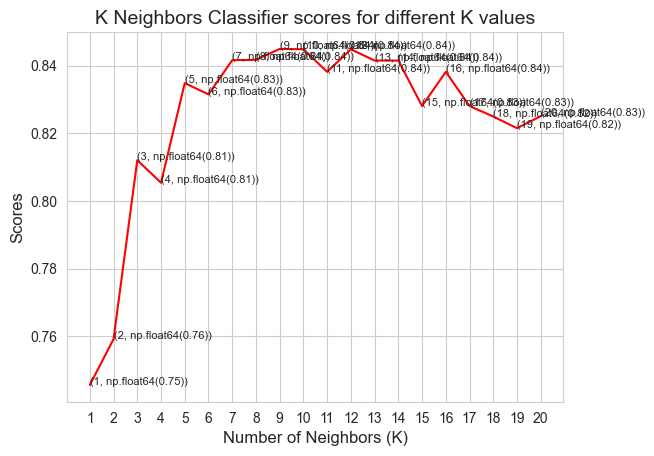

In [16]:
# Plot the scores
plt.plot([k for k in range(1, 21)], knn_scores, color='red')

# Add text labels for each point
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)), fontsize=8)

# Set xticks
plt.xticks([i for i in range(1, 21)], fontsize=10)

# Set labels and title
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('K Neighbors Classifier scores for different K values', fontsize=14)

# Show the plot
plt.show()

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.9016393442622951
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

KNN Confusion Matrix:
 [[26  3]
 [ 3 29]]


In [18]:
knn_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNN Mean Cross-validation Score:", knn_scores.mean())

KNN Mean Cross-validation Score: 0.8448387096774195


Random Forest Classifier

In [19]:
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8688524590163934
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Random Forest Confusion Matrix:
 [[26  3]
 [ 5 27]]


In [20]:
# Random Forest Cross-validation
rf_scores = cross_val_score(rf_classifier, X, y, cv=10)
print("Random Forest Mean Cross-validation Score:", rf_scores.mean())

Random Forest Mean Cross-validation Score: 0.801505376344086


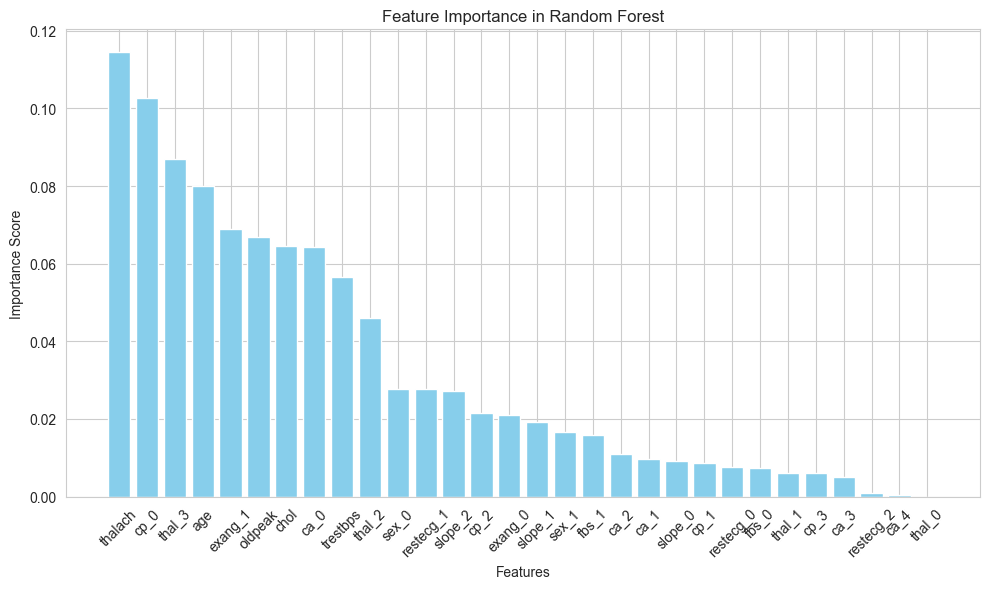

In [21]:
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert to a DataFrame for easier handling
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DecisionTreeClassifier

In [22]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



Decision Tree Accuracy: 0.8688524590163934
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Decision Tree Confusion Matrix:
 [[26  3]
 [ 5 27]]


In [23]:
# Decision Tree Cross-validation
dt_scores = cross_val_score(dt_classifier, X, y, cv=10)
print("Decision Tree Mean Cross-validation Score:", dt_scores.mean())

Decision Tree Mean Cross-validation Score: 0.735268817204301


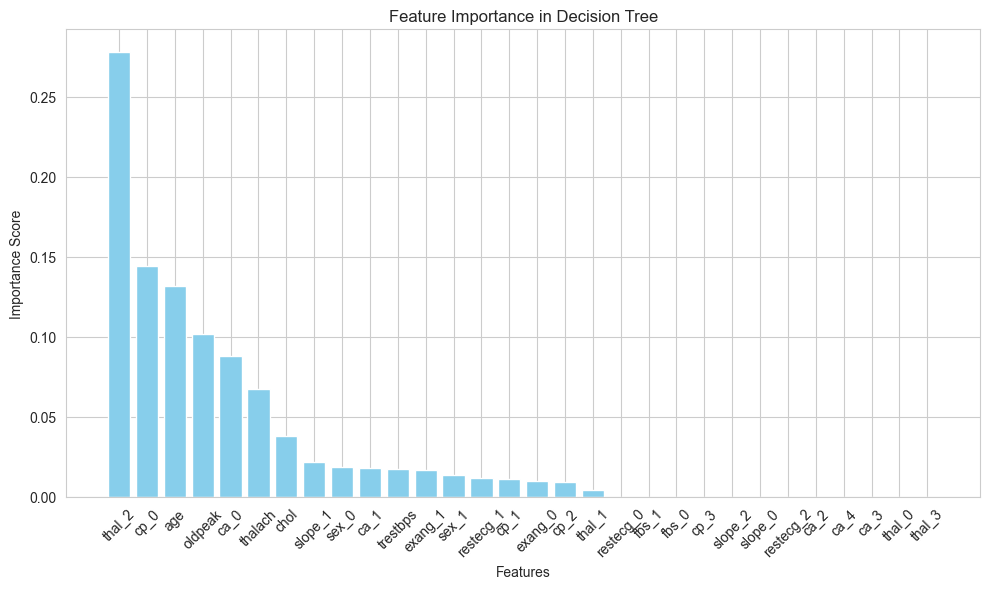

In [24]:
dt_classifier.fit(X, y)

# Get feature importances
importances = dt_classifier.feature_importances_

# Convert to a DataFrame for easy plotting
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Support Vector Machines (SVM)

In [25]:
# Support Vector Machine (SVM)
svm_classifier = svm.SVC(kernel='rbf', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9016393442622951
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

SVM Confusion Matrix:
 [[27  2]
 [ 4 28]]


In [26]:
# SVM Cross-validation
svm_scores = cross_val_score(svm_classifier, X, y, cv=10)
print("SVM Mean Cross-validation Score:", svm_scores.mean())

SVM Mean Cross-validation Score: 0.8379569892473118


Combine models using VotingClassifier

In [27]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [28]:
svm_classifier = svm.SVC(kernel='rbf', C=1, probability=True)

In [29]:
# Soft Voting
voting_soft = VotingClassifier(estimators=[('svm', svm_classifier), ('dt', dt_classifier), ('rf', rf_classifier), ('knn', knn_classifier)], voting='soft')
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

# Hard Voting
voting_hard = VotingClassifier(estimators=[('svm', svm_classifier), ('dt', dt_classifier), ('rf', rf_classifier), ('knn', knn_classifier)], voting='hard')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

Soft Voting Accuracy: 0.8688524590163934
Hard Voting Accuracy: 0.8688524590163934


In [30]:
# Soft Voting
voting_soft_scores = cross_val_score(voting_soft, X, y, cv=10)
print("Soft Voting Mean Score:", voting_soft_scores.mean())

# Hard Voting
voting_hard_scores = cross_val_score(voting_hard, X, y, cv=10)
print("Hard Voting Mean Score:", voting_hard_scores.mean())

Soft Voting Mean Score: 0.811505376344086
Hard Voting Mean Score: 0.8412903225806451


Plotting

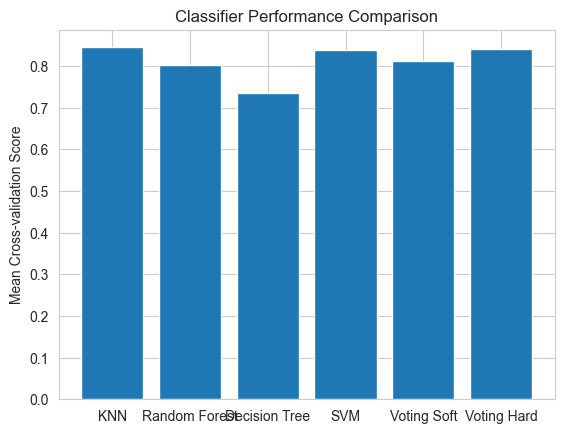

In [31]:
# Plotting
x = np.arange(6)
plt.bar(x, [knn_scores.mean(), rf_scores.mean(), dt_scores.mean(), svm_scores.mean(), voting_soft_scores.mean(), voting_hard_scores.mean()])
plt.xticks(x, ['KNN', 'Random Forest', 'Decision Tree', 'SVM', 'Voting Soft', 'Voting Hard'])
plt.ylabel('Mean Cross-validation Score')
plt.title('Classifier Performance Comparison')
plt.show()

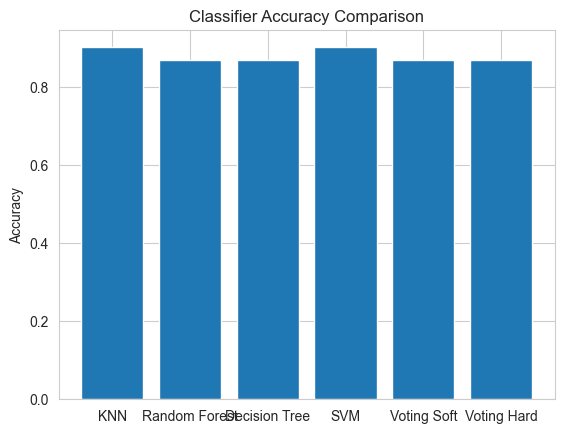

In [32]:
# Plotting
x = np.arange(6)
voting_soft_accuracy = accuracy_score(y_test, y_pred_soft)
voting_hard_accuracy = accuracy_score(y_test, y_pred_hard)

plt.bar(x, [knn_accuracy, rf_accuracy, dt_accuracy, svm_accuracy, voting_soft_accuracy, voting_hard_accuracy])
plt.xticks(x, ['KNN', 'Random Forest', 'Decision Tree', 'SVM', 'Voting Soft', 'Voting Hard'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()